Implémentation de résolution numérique approchée de l'équation 1 :
$\frac{dy}{dx} = f(x,y), 
y(a) = A$
à l'aide de la la méthode de descente de gradients sur la fonction d'erreur


In [66]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, arange, matmul
from numpy.random import randn

from matplotlib.pyplot import plot, show, yscale, legend, savefig

Paramètres du modèle

In [67]:
#nombre de coefficients de Fourier ajustables
M = 2
M_range = arange(M) + 1

# nombre de points pour la variable indépendante
N = 2
X = linspace(0,1,N)

Définition du gradient

In [68]:
def calcGrad(A, M, N, X) :
    #Calcule le gradient de l'erreur par rapport au vecteur
    #des coefficients
    grad = zeros((M))
    V = cos(2*pi*X)
    for m in range(1, M+1) :
        for i in range(N) :
            V[i] += 2*pi*m*A[m-1]*cos(2*pi*m*X[i])
    for l in range(1, M+1) :
        W = pi*l*cos(2*pi*l*X)
        grad[l-1] = dot(V,W)
    return grad

Calcul matriciel du gradient

In [69]:
mat = zeros((M,M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        mat[m-1,l-1] = m*l*dot(cos(2*pi*m*X), cos(2*pi*l*X))
mat *= 2*pi

b = zeros(M)
for l in range(1,M+1) :
    b[l-1] = -l*dot(cos(2*pi*X), cos(2*pi*l*X))
d = -b

def calcGrad_mat(A, mat, d) :
    return matmul(mat, A) + d

Calcul de l'erreur

In [70]:
def calcError(A, M, N, X) :
    E = 0
    for i in range(N) :
        e = 0
        for m in range(1,M+1) :
            e+=m*A[m-1]*cos(2*pi*m*X[i])
        e *= 2*pi
        e+= cos(2*pi*X[i])
        E += e**2

    E *=0.5
    return E

Vecteurs $\bf{A}$ de test

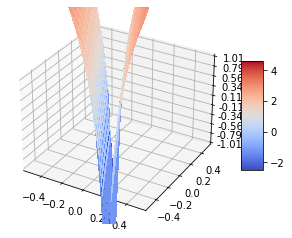

In [72]:
from matplotlib.pyplot import subplots
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from numpy import meshgrid, array, log

fig, ax = subplots(subplot_kw={"projection": "3d"})

resolution = 20
# Make data.
A_1 = linspace(-0.5, 0.5, resolution)
A_2 = linspace(-0.5, 0.5, resolution)
XX, YY = meshgrid(A_1, A_2)


Z = zeros((resolution,resolution))
for x in range(resolution) :
    for y in range(resolution) :
        E = calcError(array([A_1[x],A_2[y]]), M, N, X)
        Z[x,y] = log(E)

# Plot the surface.
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

show()


Entraînement

In [ ]:
E_min = []
E_1 = []

for k in range(epochs) :
    if k%(epochs//100)==0 :
        #print("Coefficients après",k,"itérations :",A)
        E_min.append(calcError(A_min,M,N,X))
        E_1.append(calcError(A_1,M,N,X))

    A_min -= alpha_min*calcGrad_mat(A_min, mat, d)
    A_1 -= alpha_min*calcGrad_mat(A_1, mat, d)

E_min.append(calcError(A_min,M,N,X))
E_1.append(calcError(A_1,M,N,X))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 2)

Affichage des résultats

In [ ]:
print()
print("Coefficients finaux A_min après",epochs,"itérations :",A_min)
print("Coefficients finaux A_1 après",epochs,"itérations :",A_1)

Affichage graphique de l'erreur

In [ ]:
plot(range(101), E_min, label = 'E_min')
plot(range(101), E_1, label = 'E_1')
yscale('log')
legend()
savefig("comparaison_erreurs_selon_alpha.jpg")
show()

In [ ]:
#print((A[0]+(1/2/pi)), (A[0]+(1/2/pi))*2*pi)